# Exploratory data analysis report on stack overflow annual developer survey

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Loading data into a data frame

In [6]:
survey_raw_df = pd.read_csv('survey_results_public.csv',on_bad_lines='skip')

In [7]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
19027,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19028,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19029,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [8]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [9]:
schema_df = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText

In [10]:
schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [11]:
schema_df['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [12]:
selected_columns = np.array([#Demographics
                       'Country','Age','Gender','EdLevel','UndergradMajor',
                      #programming exp
                        'Hobbyist', 'Age1stCode', 'YearsCode','YearsCodePro',
                        'LanguageDesireNextYear', 'LanguageWorkedWith','NEWStuck',
                        'NEWLearn',
                       #Employment
                        'Employment','DevType',
                        'WorkWeekHrs','JobFactors','JobSat',
                        'NEWEdImpt','NEWOvertime',
                      ])

In [13]:
selected_columns.shape

(20,)

## Copying columns to analyze

In [14]:
survey_df = survey_raw_df[selected_columns].copy()

In [15]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageDesireNextYear,LanguageWorkedWith,NEWStuck,NEWLearn,Employment,DevType,WorkWeekHrs,JobFactors,JobSat,NEWEdImpt,NEWOvertime
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Visit Stack Overflow;Go for a walk or other ph...,Once a year,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,"Languages, frameworks, and other technologies ...",Slightly satisfied,Fairly important,Often: 1-2 days per week or more
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,Python;Swift,JavaScript;Swift,Visit Stack Overflow;Go for a walk or other ph...,Once a year,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,NaN,Very dissatisfied,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,NaN,Once a year,NaN,NaN,40.0,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,Not at all important/not necessary,Occasionally: 1-2 days per quarter but less th...
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,Call a coworker or friend;Visit Stack Overflow...,Once a year,Employed full-time,NaN,NaN,NaN,NaN,Very important,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Call a coworker or friend,Once a decade,Employed full-time,Senior executive/VP,NaN,NaN,NaN,Very important,NaN
19027,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
19028,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19029,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;Java;JavaScript,HTML/CSS,Call a coworker or friend;Visit Stack Overflow,Once a year,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
schema = schema_df[selected_columns].copy()

In [17]:
schema

,QuestionText
Column,
Country,Where do you live?
Age,What is your age (in years)? If you prefer not...
Gender,"Which of the following describe you, if any? P..."
EdLevel,Which of the following best describes the high...
UndergradMajor,What was your primary field of study?
Hobbyist,Do you code as a hobby?
Age1stCode,At what age did you write your first line of c...
YearsCode,"Including any education, how many years have y..."
YearsCodePro,"NOT including education, how many years have y..."


In [18]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19031 entries, 0 to 19030
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 18882 non-null  object 
 1   Age                     12969 non-null  float64
 2   Gender                  14589 non-null  object 
 3   EdLevel                 16695 non-null  object 
 4   UndergradMajor          14780 non-null  object 
 5   Hobbyist                19023 non-null  object 
 6   Age1stCode              16844 non-null  object 
 7   YearsCode               16784 non-null  object 
 8   YearsCodePro            12912 non-null  object 
 9   LanguageDesireNextYear  15674 non-null  object 
 10  LanguageWorkedWith      16719 non-null  object 
 11  NEWStuck                15975 non-null  object 
 12  NEWLearn                16379 non-null  object 
 13  Employment              18812 non-null  object 
 14  DevType                 14025 non-null

## Data Cleaning

In [19]:
#counting NaN values
(survey_df['Age'].isnull().sum()*100)/(64461)

9.404135834070212

In [20]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '50', '54', '48',
       '56', '37', '39', '34', '49', '45', '44', 'Older than 85', '63',
       '55', '51', '68', '47', '43'], dtype=object)

In [21]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode,errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode,errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro,errors = 'coerce')
survey_df['Age'] = pd.to_numeric(survey_df['Age'], errors='coerce')

In [22]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,12969.000000,16701.000000,16452.000000,12262.000000,11311.000000
mean,31.156697,15.641279,12.858741,9.269695,40.751065
std,10.154961,5.343068,9.935828,8.279008,15.211054
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,5.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,36.000000,18.000000,18.000000,13.000000,45.000000
max,99.000000,68.000000,50.000000,50.000000,385.000000


In [23]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)

In [24]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [25]:
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Angular;Angular.js;ASP.NET;ASP.NET Core;Django;jQuery',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Appropriate in length', 'Java;Python;Swift'], dtype=object)

In [26]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [27]:
survey_df.Gender.value_counts()

,count
Gender,
Man,13274
Woman,1093
"Non-binary, genderqueer, or gender non-conforming",103
Appropriate in length,1


In [28]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [29]:
#country
survey_df.Country.nunique()

167

In [30]:
top_countries = survey_df.Country.value_counts().head(10);top_countries

,count
Country,
United States,5186
India,2121
Germany,873
Canada,868
United Kingdom,836
Brazil,536
France,439
Australia,404
Poland,323


## Top countries with most responses

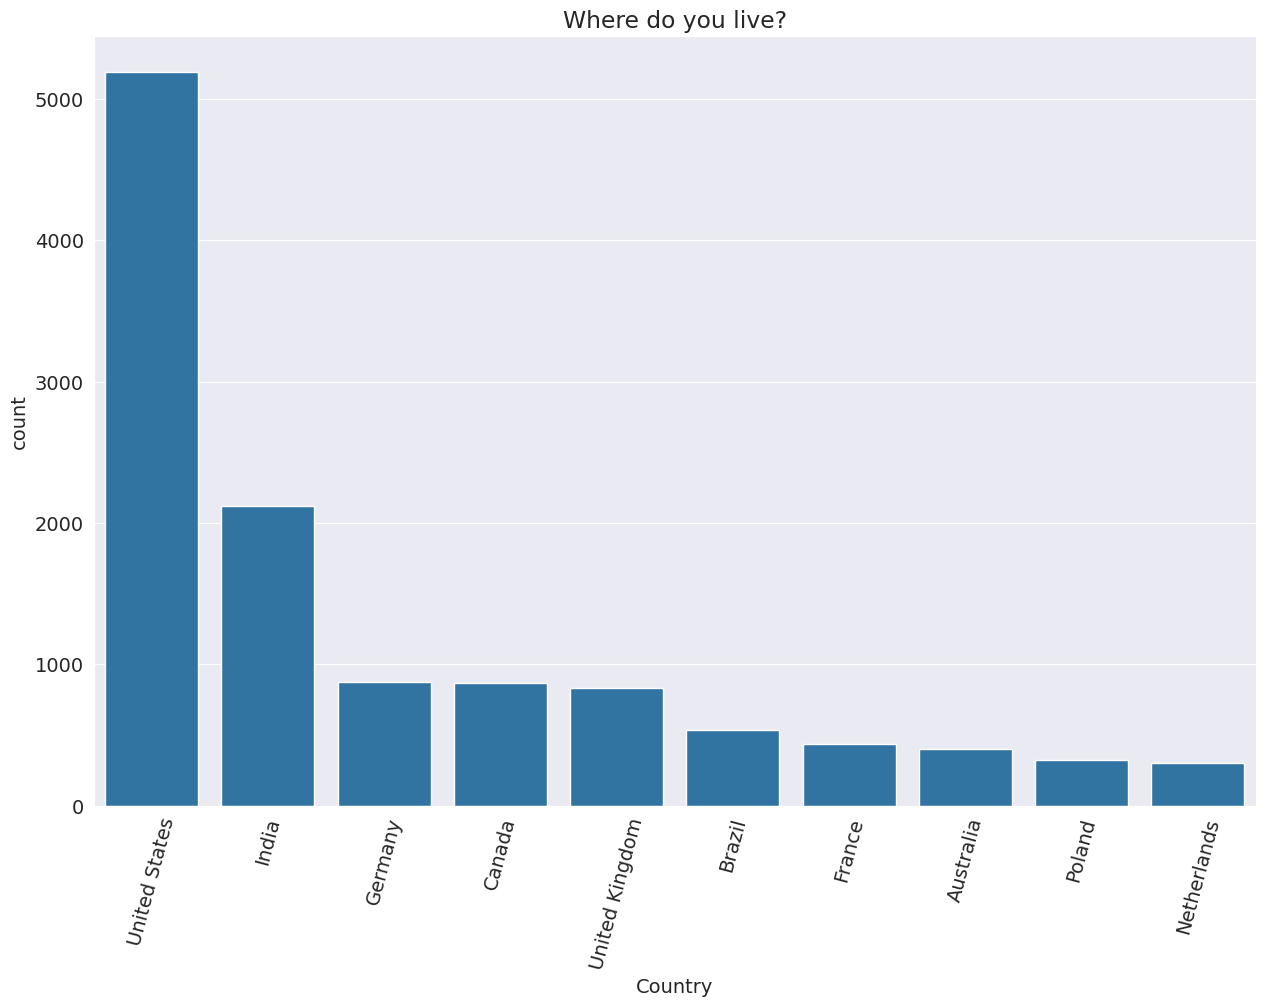

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index,y=top_countries);

## Age of Respondents

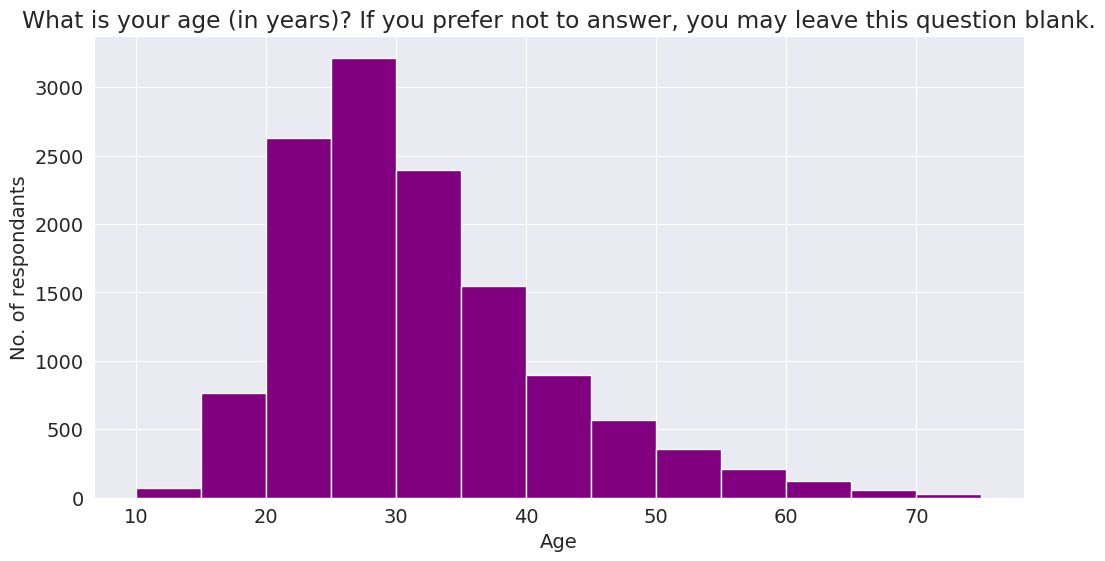

In [32]:
plt.title(schema.Age)
plt.ylabel('No. of respondants')
plt.xlabel('Age')
plt.hist(survey_df.Age,bins = np.arange(10,80,5),color='purple');

## Gender of Respondants

In [33]:
gender_counts= survey_df.Gender.value_counts()

In [34]:
gender_counts

,count
Gender,
Man,13274
Woman,1093
"Non-binary, genderqueer, or gender non-conforming",103
Appropriate in length,1


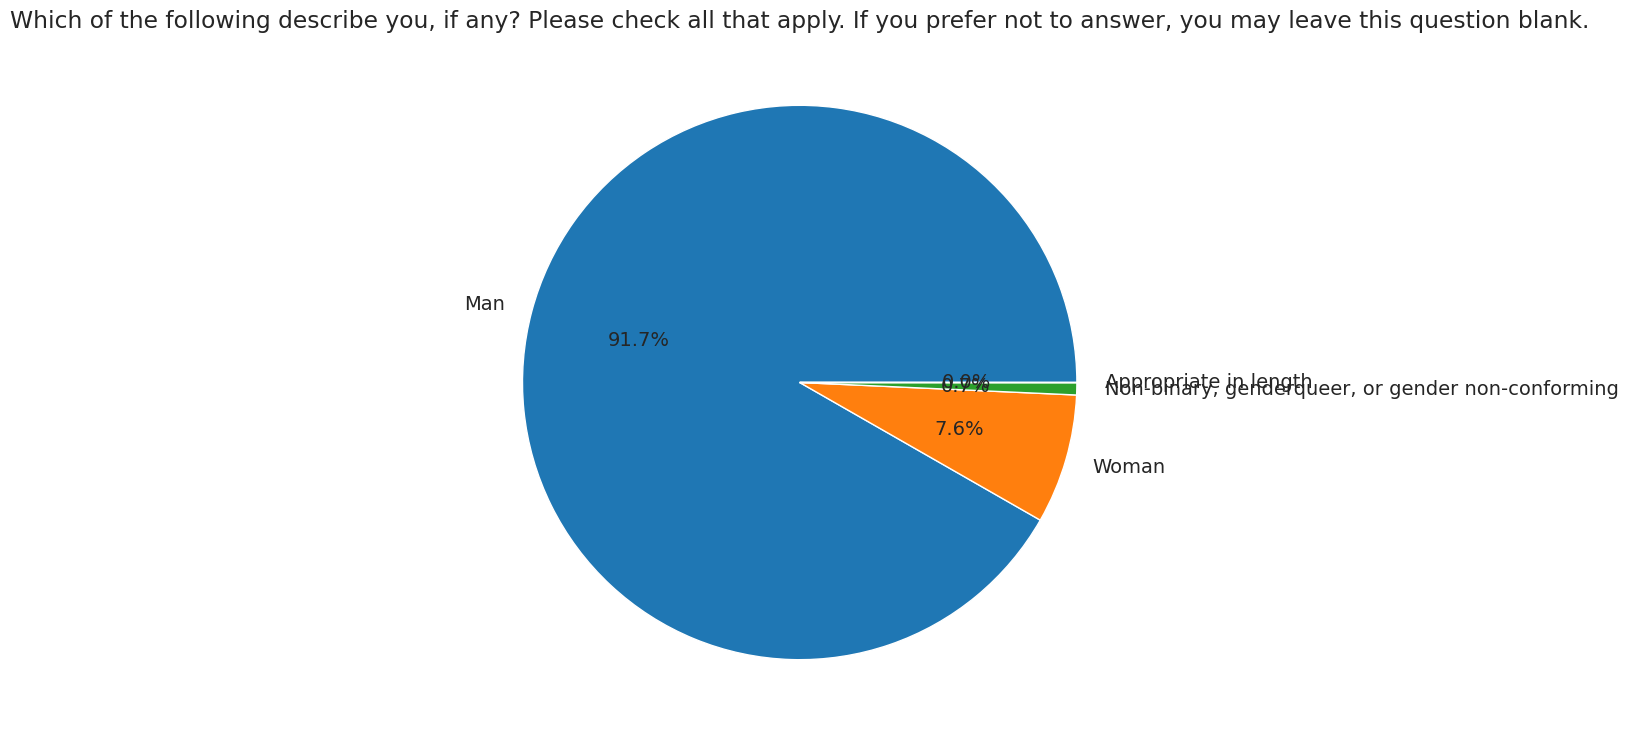

In [35]:
plt.figure(figsize=(9,9))
plt.title(schema.Gender)
plt.pie(gender_counts,labels = gender_counts.index,autopct='%1.1f%%');

## Education Level of the respondants

In [36]:
survey_df.EdLevel.nunique()

9

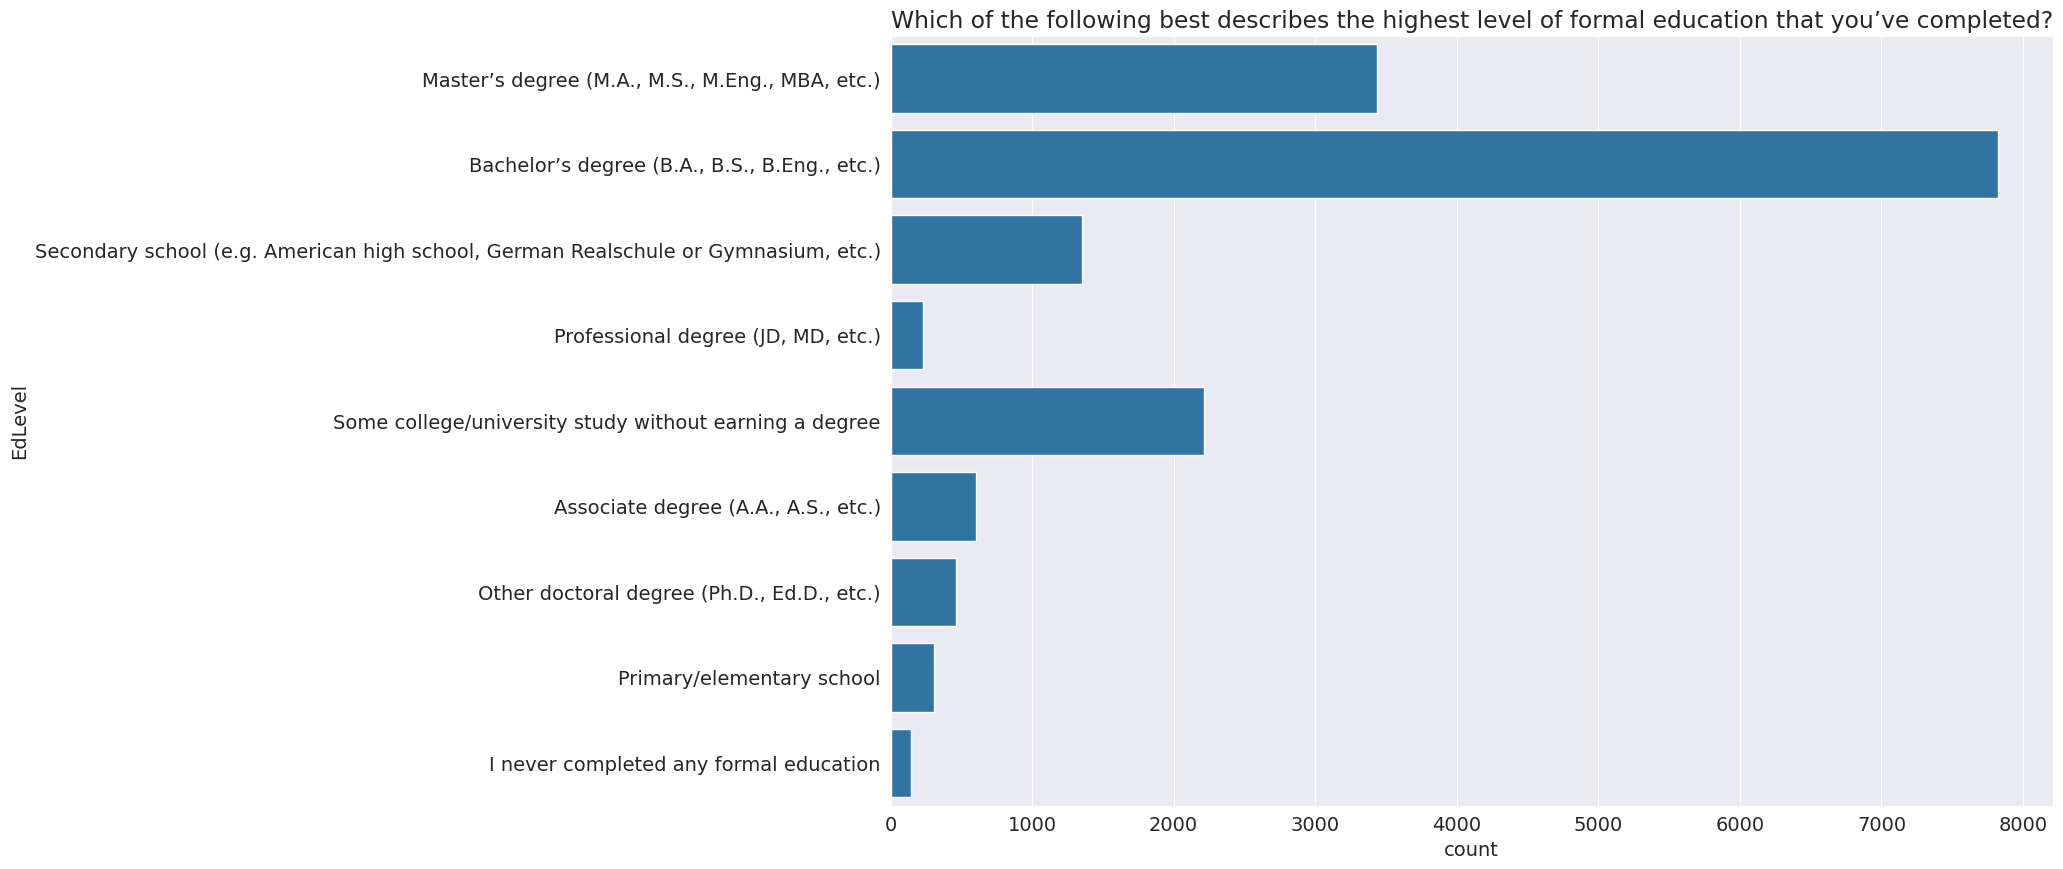

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(y=survey_df.EdLevel)
plt.title(schema.EdLevel);

## Field of study during Undergrad

In [38]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

In [39]:
undergrad_pct

,count
UndergradMajor,
"Computer science, computer engineering, or software engineering",60.047684
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",9.305177
"Information systems, information technology, or system administration",8.174387
"A natural science (such as biology, chemistry, physics, etc.)",4.291553
Web development or web design,3.603542
Mathematics or statistics,3.569482
"A business discipline (such as accounting, finance, marketing, etc.)",3.208447
"A humanities discipline (such as literature, history, philosophy, etc.)",2.343324
"A social science (such as anthropology, psychology, political science, etc.)",2.227520


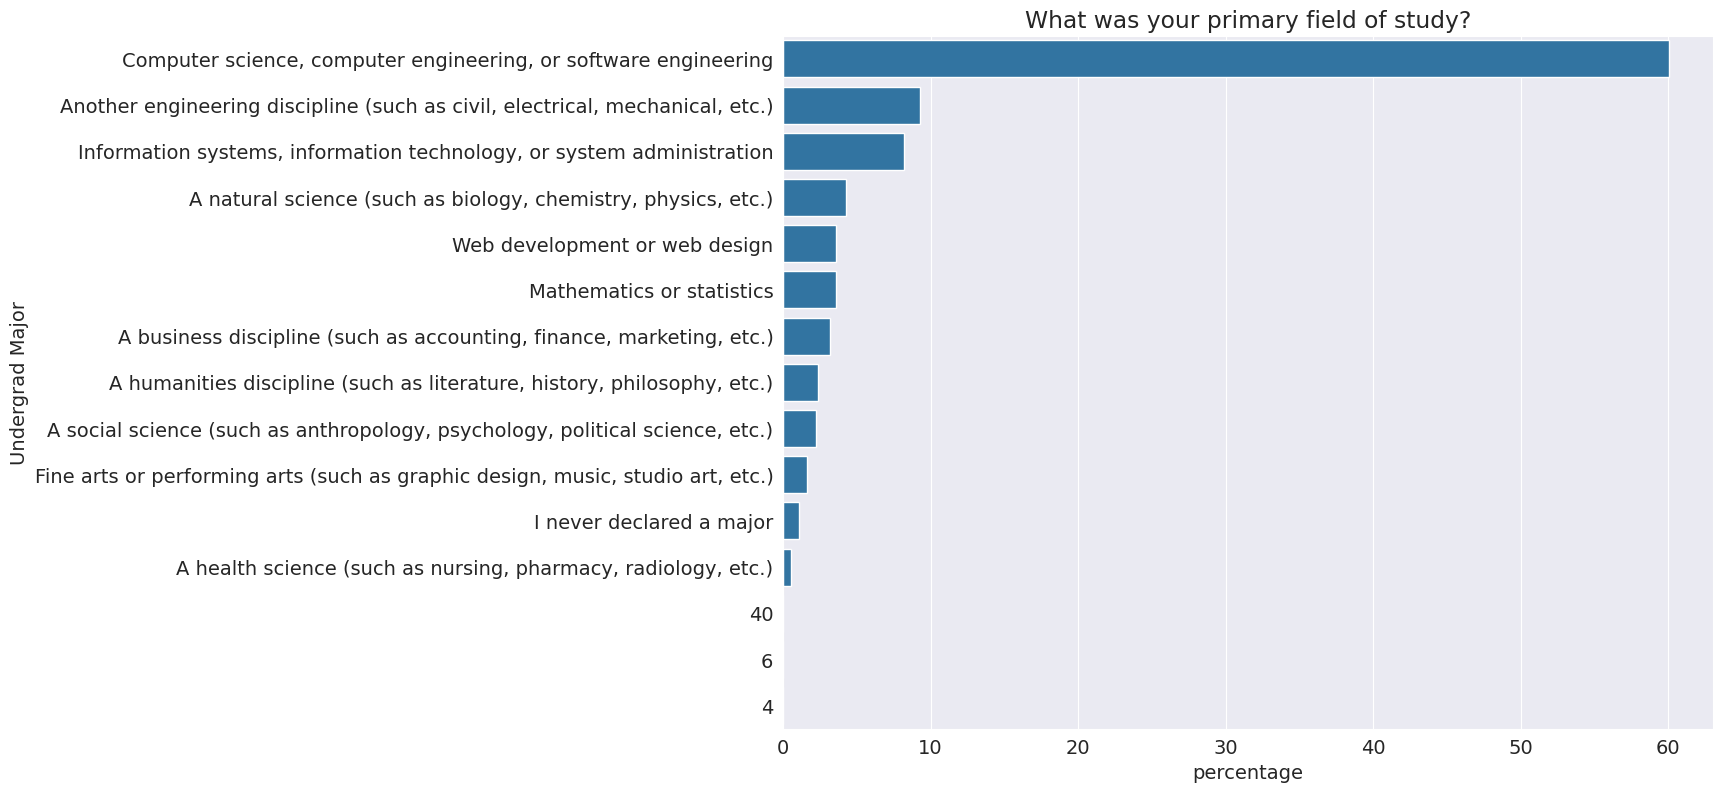

In [40]:
plt.figure(figsize=(12,9))
plt.title(schema.UndergradMajor)
plt.ylabel('Undergrad Major')
sns.barplot(x=undergrad_pct,y=undergrad_pct.index)
plt.xlabel('percentage');

## Type of employment of respondents

In [41]:
survey_df.Employment.nunique()

8

In [42]:
Employment = survey_df.Employment.value_counts()*100/survey_df.Employment.count()

In [43]:
Employment

,count
Employment,
Employed full-time,67.674282
Student,13.535926
"Independent contractor, freelancer, or self-employed",9.218340
"Not employed, but looking for work",4.884704
Employed part-time,3.515061
"Not employed, and not looking for work",0.636670
Retired,0.529667
Employer day,0.005350


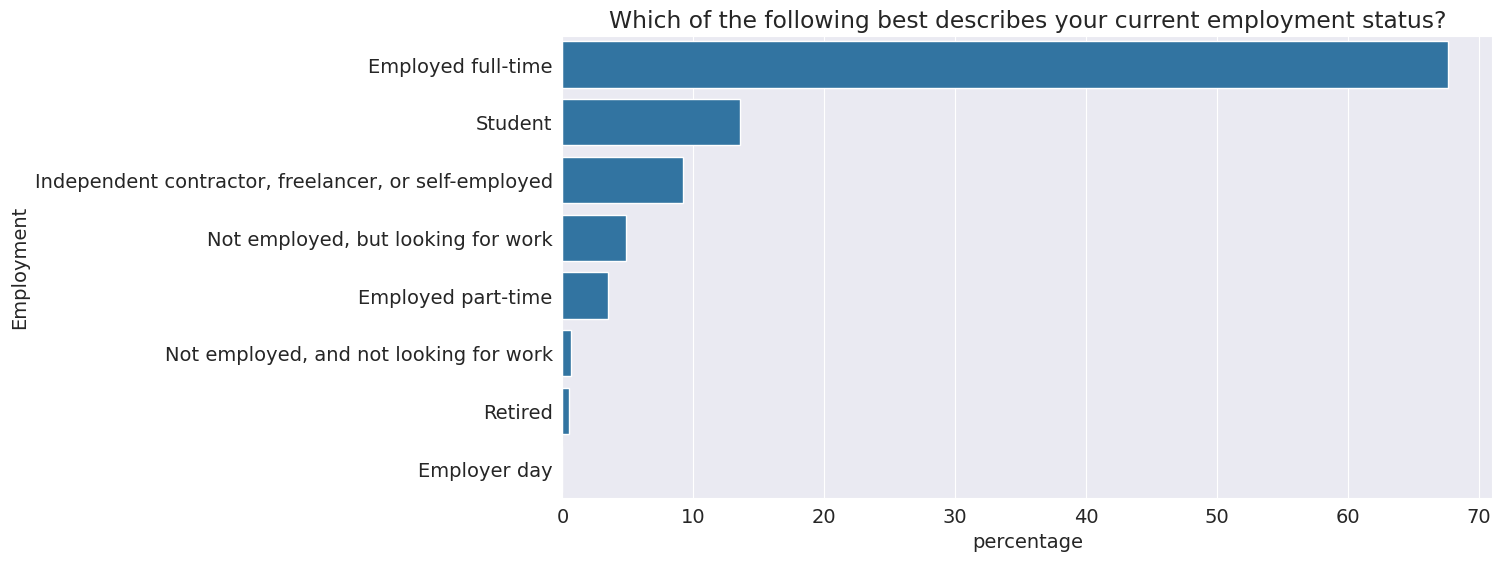

In [44]:
plt.title(schema.Employment)
sns.barplot(x=Employment,y=Employment.index)
plt.xlabel('percentage');

## Type of developer

In [45]:
survey_df.DevType

,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
19026,Senior executive/VP
19027,NaN
19028,NaN
19029,NaN


In [46]:
#splitting data into multiple columns because of multiple responses

def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx,value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx,option] = True
    return result_df[options]

In [47]:
devtype_df = split_multicolumn(survey_df.DevType)

In [48]:
devtype_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19029,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
devtype_pct = devtype_df.sum()*100/devtype_df.count();devtype_pct

,0
"Developer, desktop or enterprise applications",17.643034
"Developer, full-stack",40.528449
"Developer, mobile",13.148060
Designer,8.600453
"Developer, front-end",27.338281
"Developer, back-end",39.828412
"Developer, QA or test",5.731881
DevOps specialist,8.832044
"Developer, game or graphics",4.526554
Database administrator,9.021527


## Percentage plot of different types of developers

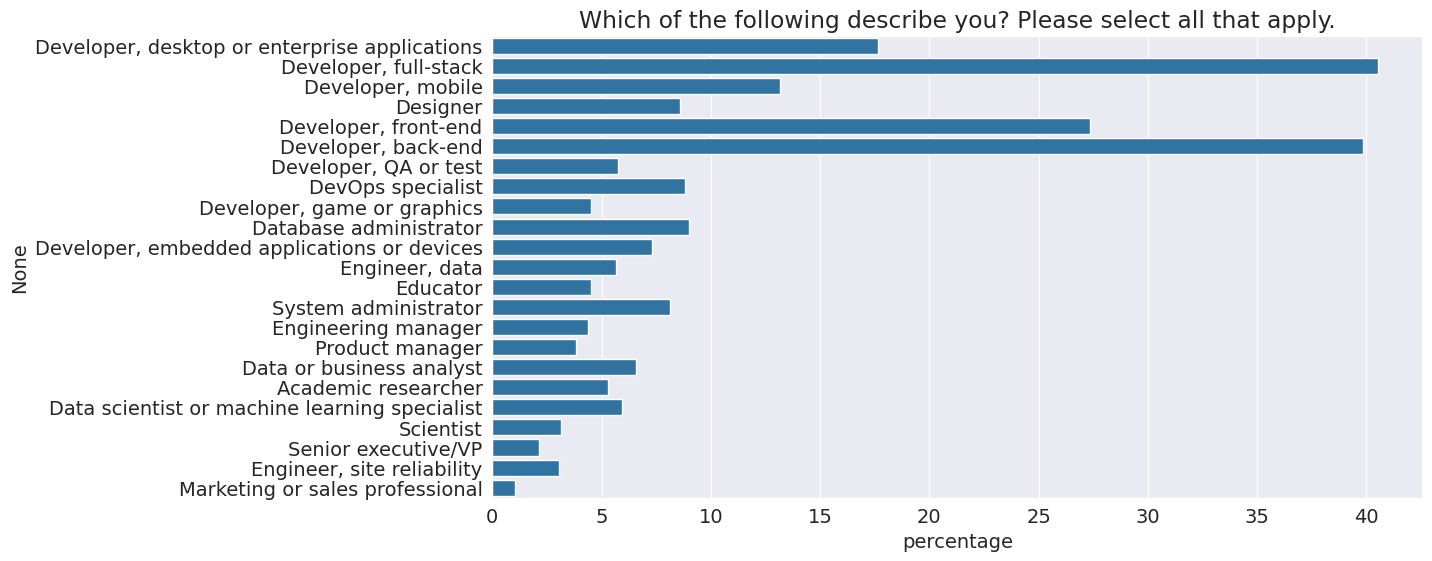

In [50]:
sns.barplot(x=devtype_pct,y=devtype_pct.index);
plt.title(schema.DevType)
plt.xlabel('percentage');

## Pie chart of people who do coding as a hobby

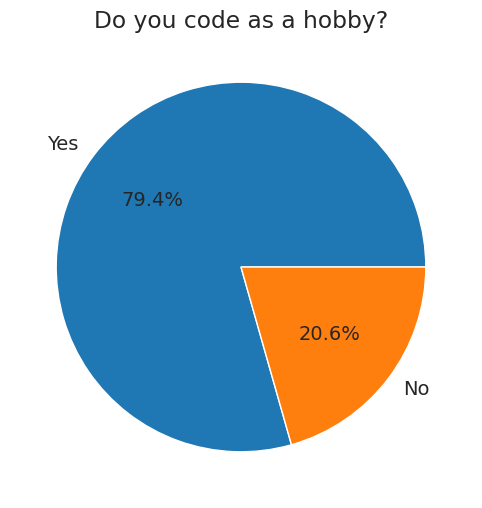

In [51]:
plt.title(schema.Hobbyist)
plt.pie(survey_df.Hobbyist.value_counts(),
        labels = survey_df.Hobbyist.value_counts().index,
        autopct='%1.1f%%');

In [52]:
schema

,QuestionText
Column,
Country,Where do you live?
Age,What is your age (in years)? If you prefer not...
Gender,"Which of the following describe you, if any? P..."
EdLevel,Which of the following best describes the high...
UndergradMajor,What was your primary field of study?
Hobbyist,Do you code as a hobby?
Age1stCode,At what age did you write your first line of c...
YearsCode,"Including any education, how many years have y..."
YearsCodePro,"NOT including education, how many years have y..."


In [53]:
#'Very satisfied' = 10
#'Very dissatisfied' = 0
#'Slightly satisfied' = 7.5
#'Slightly dissatisfied' = 2.5
#'Neither satisfied nor dissatisfied' = 5
survey_df.replace({'JobSat':{10:'Very satisfied',0:'Very dissatisfied',
                            7.5:'Slightly satisfied',2.5:'Slightly dissatisfied',
                            5:'Neither satisfied nor dissatisfied'}},inplace = True)

In [54]:
work_sat = survey_df[['WorkWeekHrs','JobSat']]

In [55]:
work_sat=work_sat.groupby(['JobSat']).mean();work_sat

,WorkWeekHrs
JobSat,
"old friend""",NaN
"Computer science, computer engineering, or software engineering",NaN
Github;Gitlab,NaN
Neither satisfied nor dissatisfied,40.221608
"Read company media, such as employee blogs or company culture videos;Read other media like news articles, founder profiles, etc. about the company;Directly asking current or past employees at the company",NaN
Slightly dissatisfied,40.275551
Slightly satisfied,39.995319
Very dissatisfied,40.371395
Very satisfied,40.499738


## Variation of Work hours per week to Job satisfaction

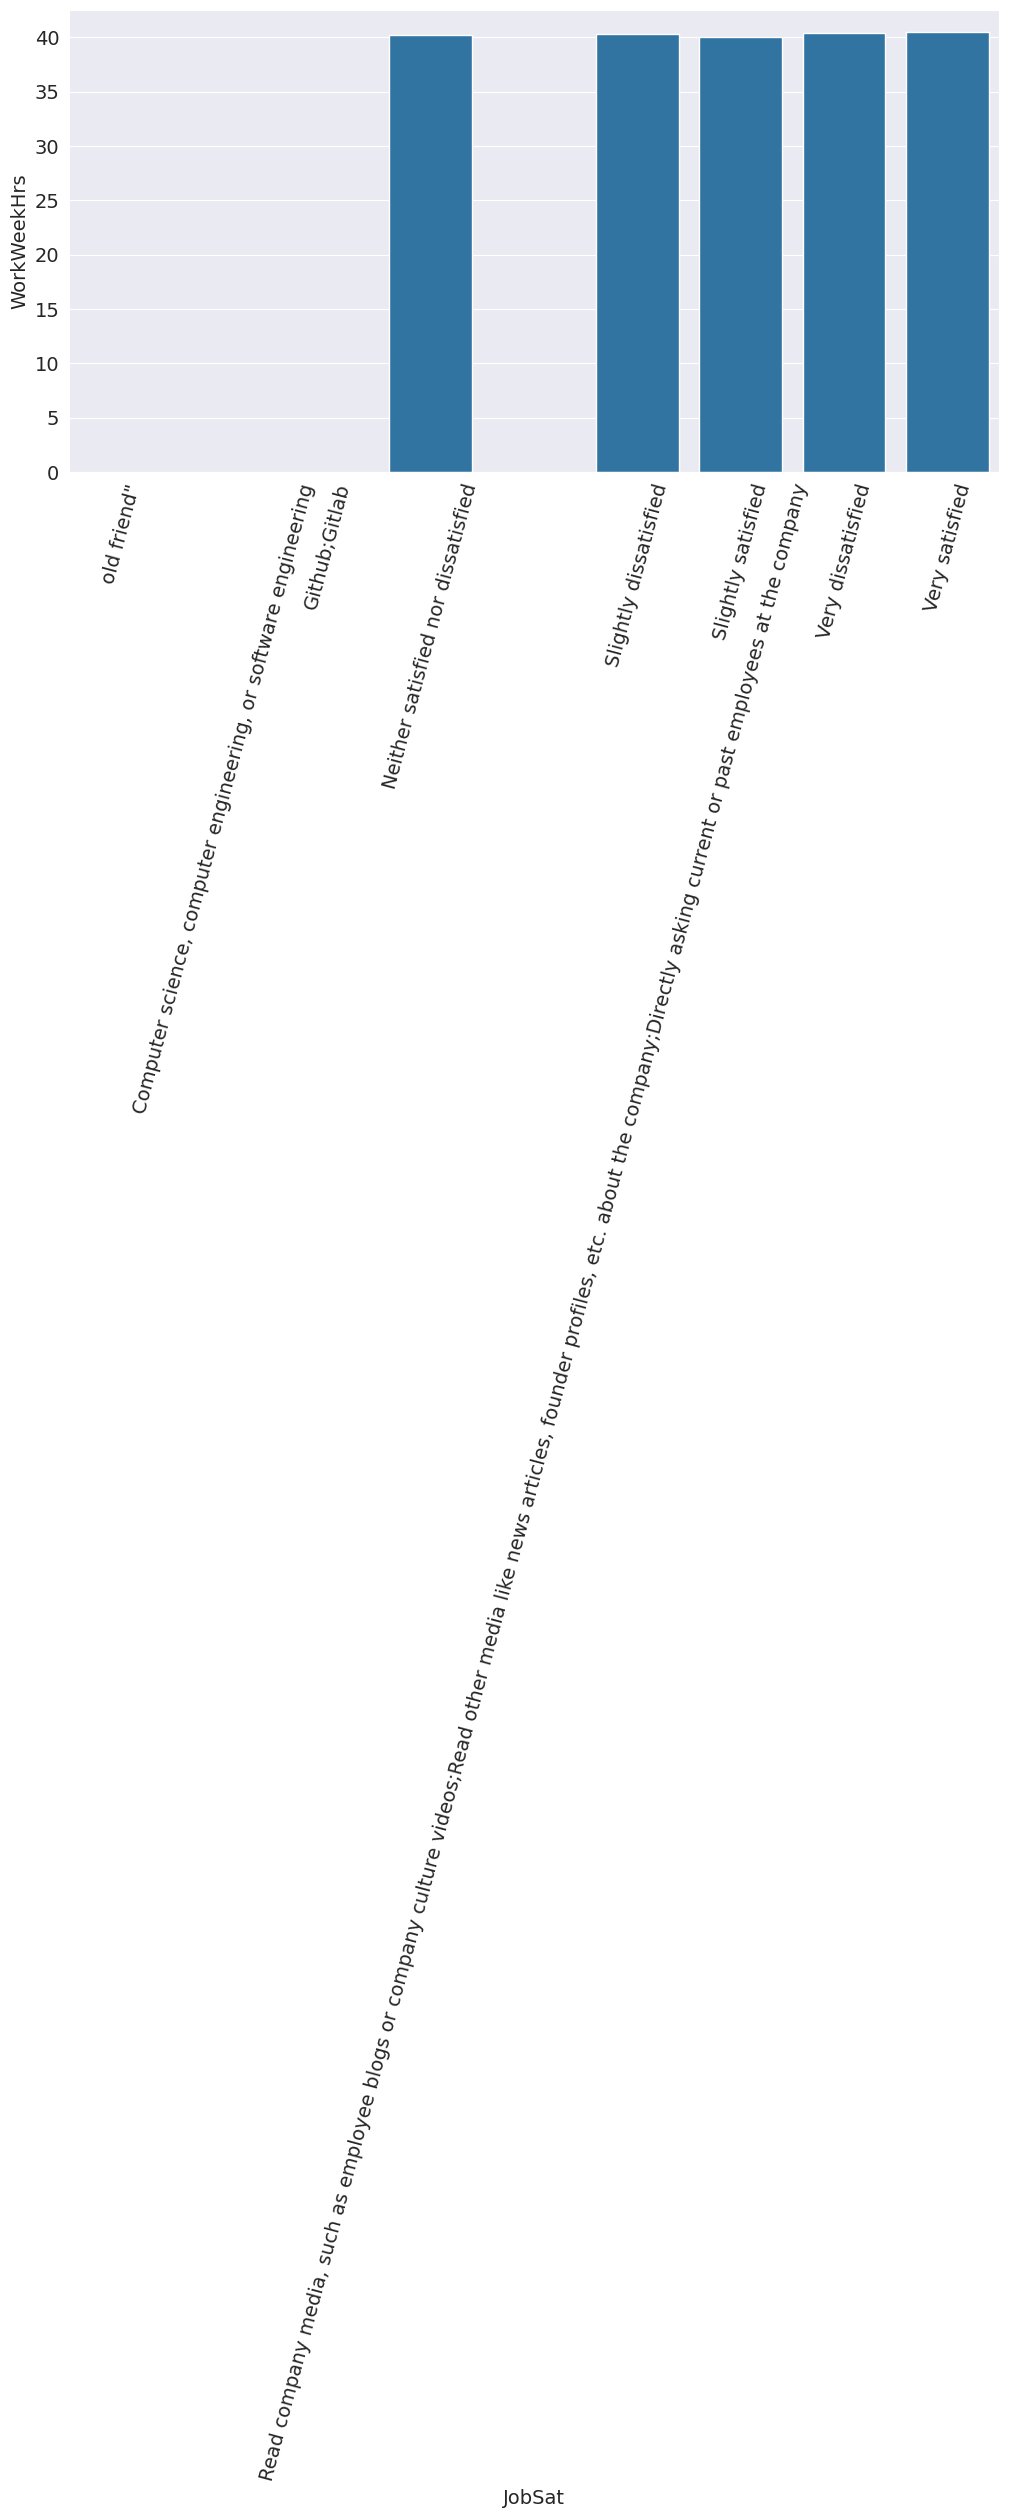

In [56]:
plt.xticks(rotation=75)
sns.barplot(x = work_sat.index,y=work_sat.WorkWeekHrs);

In [57]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [58]:
survey_df.LanguageWorkedWith.nunique()

6000

In [59]:
lang_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [60]:
lang_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,Go,Haskell,Rust,Dart,Julia,Assembly,Linux-based,Somewhat less welcome now than last year,Neutral,Onboarding? What onboarding?
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19027,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
19028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19029,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
lang_pct = lang_df.mean().sort_values(ascending=False)*100

## Most worked with languages of the year

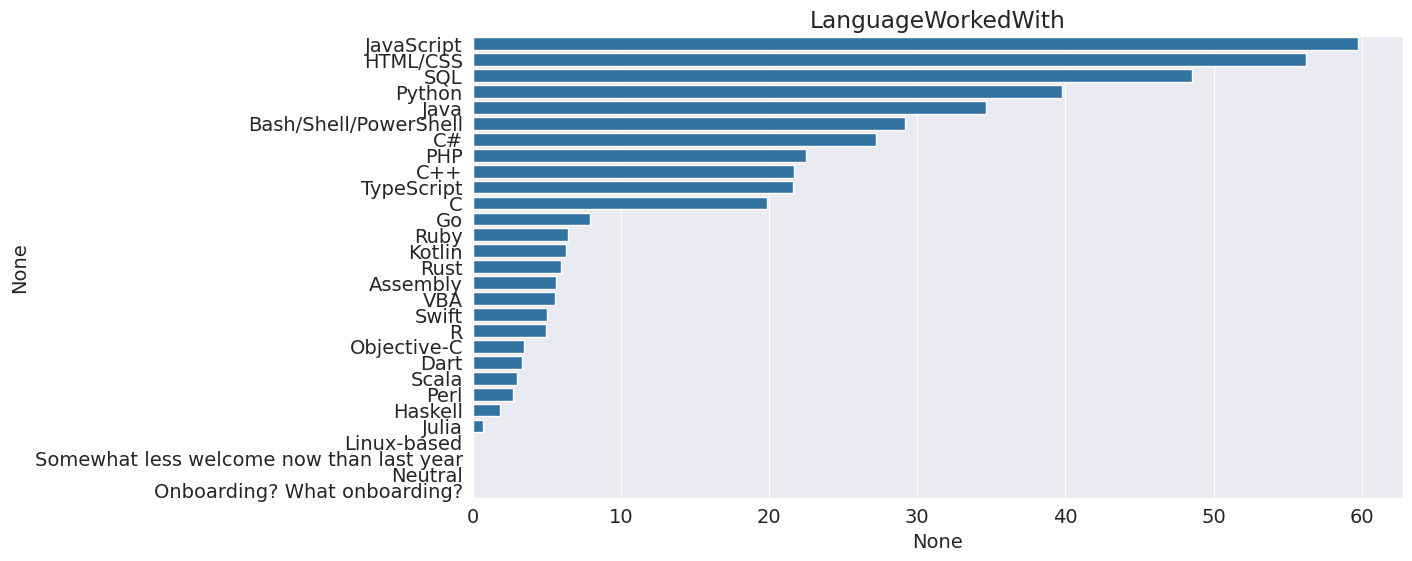

In [62]:
plt.title('LanguageWorkedWith')
sns.barplot(y = lang_pct.index , x = lang_pct);

In [63]:
langDesired_df = split_multicolumn(survey_df.LanguageDesireNextYear)

In [64]:
langDesired_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Perl,C++,Julia,Kotlin,Dart,VBA,Visit Stack Overflow,Watch help / tutorial videos,Yes,No
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19027,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
19028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19029,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
langDesired_pct = langDesired_df.mean().sort_values(ascending=False)*100

## Most desired language of the next year

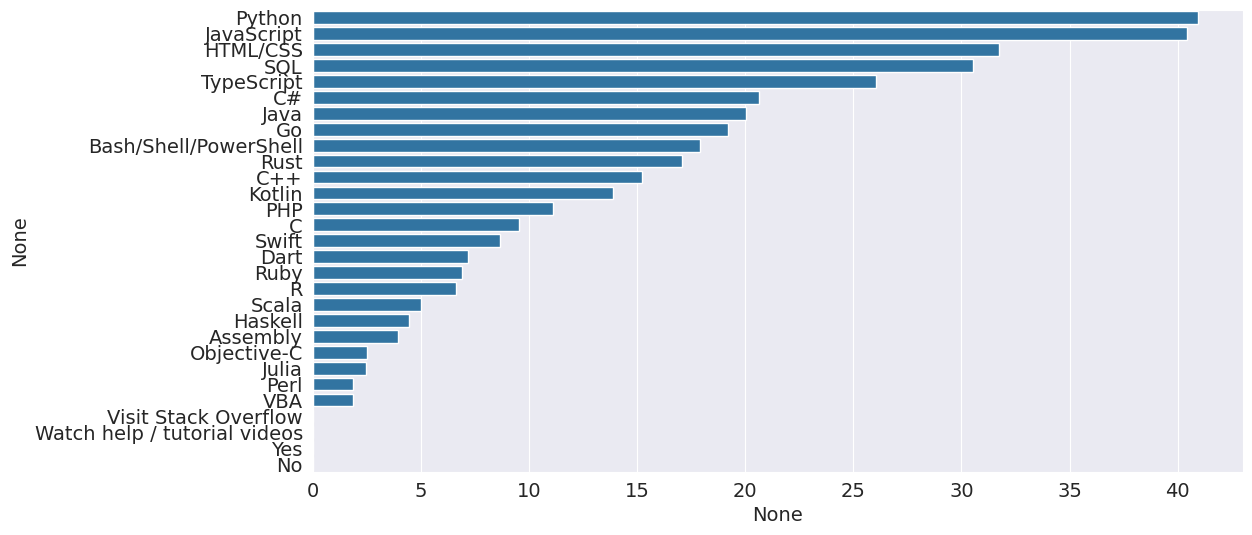

In [66]:
sns.barplot(x = langDesired_pct , y = langDesired_pct.index);

In [67]:
lang_mostLoved = langDesired_df & lang_df

In [68]:
lang_mostLoved

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Rust,SQL,Scala,Somewhat less welcome now than last year,Swift,TypeScript,VBA,Visit Stack Overflow,Watch help / tutorial videos,Yes
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,NaN,False,False,False,NaN,NaN,NaN
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,NaN,True,False,False,NaN,NaN,NaN
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,NaN,True,False,False,NaN,NaN,NaN
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,NaN,False,False,False,NaN,NaN,NaN
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,NaN,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,NaN,False,False,False,NaN,NaN,NaN
19027,True,True,True,True,True,True,True,True,True,True,...,True,True,True,NaN,True,True,True,NaN,NaN,NaN
19028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,NaN,False,False,False,NaN,NaN,NaN
19029,False,False,False,False,False,False,False,True,False,False,...,False,False,False,NaN,False,False,False,NaN,NaN,NaN


In [69]:
lang_mostLoved_pct = lang_mostLoved.mean().sort_values(ascending=False)*100

## Most loved language

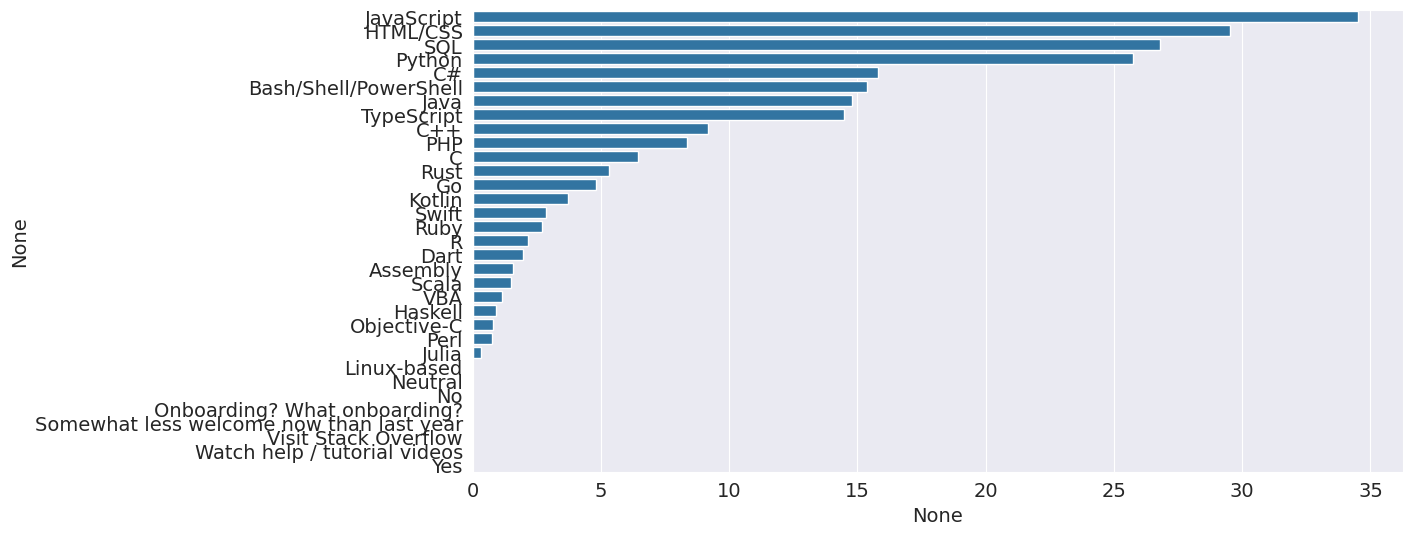

In [70]:
sns.barplot(x = lang_mostLoved_pct , y = lang_mostLoved_pct.index);

In [71]:
country_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean()

In [72]:
country_df.sort_values(by='WorkWeekHrs' ,ascending =False)

,WorkWeekHrs
Country,
Kuwait,68.666667
Côte d'Ivoire,56.000000
Qatar,53.500000
Azerbaijan,51.500000
Uzbekistan,50.000000
...,...
Sierra Leone,NaN
Solomon Islands,NaN
Somalia,NaN


In [73]:
x = survey_df.Country.value_counts()>250

In [74]:
country_df.loc[x].sort_values(by = 'WorkWeekHrs',ascending = False).head(15)

,WorkWeekHrs
Country,
United States,41.813643
Canada,40.165000
Russian Federation,40.136646
India,40.131623
France,39.728682
Australia,39.382943
Spain,39.345745
Brazil,39.340361
Netherlands,39.290503


In [75]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [76]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

## Years of coding experience of respondents

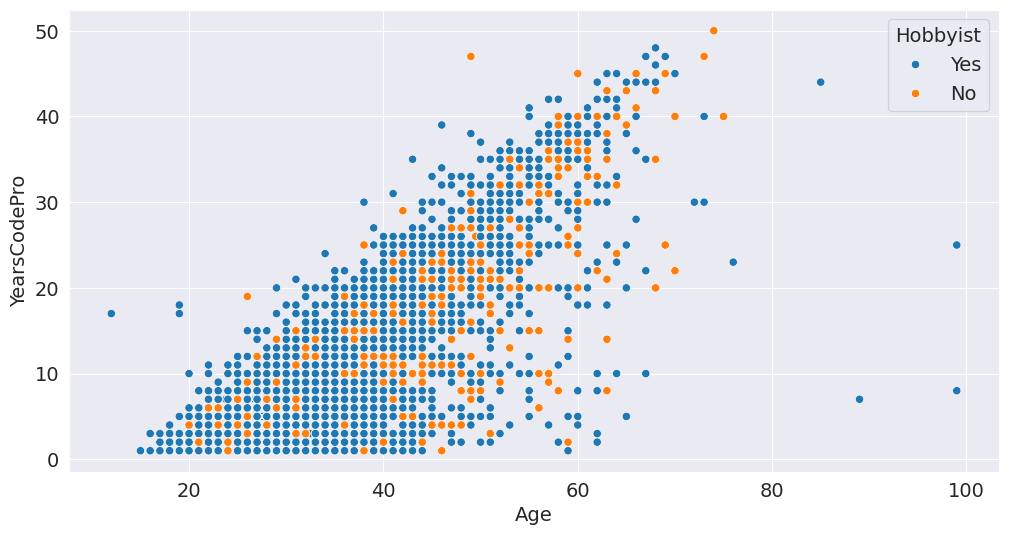

In [77]:
sns.scatterplot(y = survey_df.YearsCodePro,x =survey_df.Age,hue = survey_df.Hobbyist);

In [78]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [79]:
survey_df.Age1stCode.unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5., 28.,
       38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 36., 33., 50.,
       54., 48., 56., 37., 39., 34., 49., 45., 44., 63., 55., 51., 68.,
       47., 43.])

## Age at which people started coding

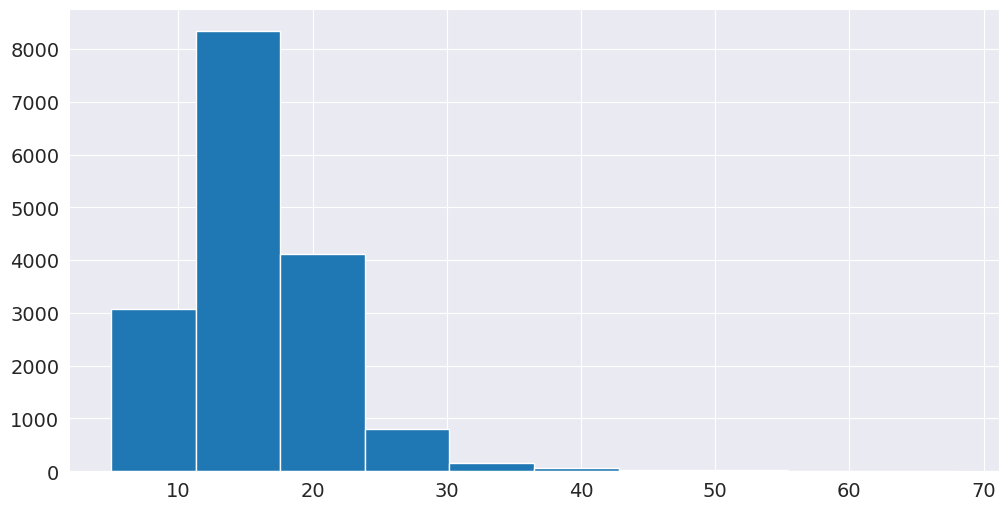

In [80]:
plt.hist(survey_df.Age1stCode);

In [81]:
# in which country people code as a hobby
hobby_df = survey_df[survey_df.Hobbyist=='Yes'].groupby('Country').Hobbyist.value_counts().sort_values(ascending=False).head(8)

In [82]:
hobby_df = hobby_df.reset_index(level='Hobbyist', drop=True)

## Countries where people code as a hobby

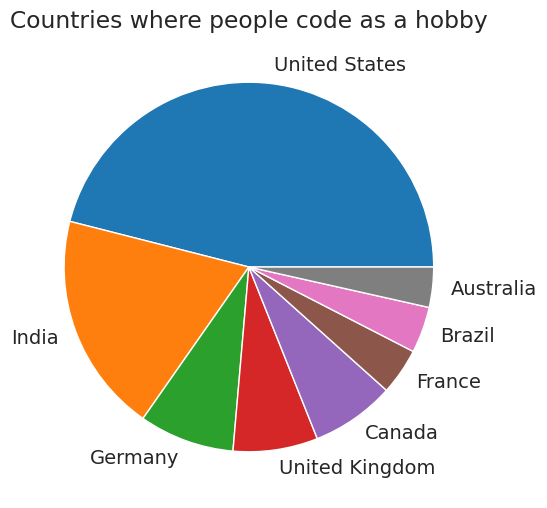

In [83]:
plt.pie(hobby_df,labels = hobby_df.index);
plt.title('Countries where people code as a hobby');

# Conclusion of the exploratory data analysis

Based on the demographics of the survey respondents, we can infer that the survey is :-<br>
- Somewhat representative of the overall programming community, although it definitely has fewer responses from programmers in non-English-speaking countries and from women & non-binary genders.
- The programming community is not as diverse as it can be, and although things are
improving, we should take more efforts to support & encourage members of underrepresented
communities - whether it is in terms of age, country, race, gender or otherwise.
-  Most programmers hold a college degree, although a fairly large percentage did not have
computer science as their major in college, so a computer science degree isn't compulsory for
learning to code or building a career in programming.
-  A significant percentage of programmers either work part time or as freelancers, and this can
be a great way to break into the field, especially when you're just getting started.
-  Javascript & HTML/CSS are the most used programming languages in 2020, closely followed
by SQL & Python
- Python is the language most people are interested in learning - since it is an easy-to-learn
general purpose programming language well suited for a variety of domains.